# Solution

Name - Yash Jain

NUID - 001521876

Importing all the required library

In [31]:
import pandas as pd
from scipy.stats import skellam
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from pymc3 import Poisson

Importing the CSV file

Variable **Europe** has the list of all european countries

In [32]:
data = pd.read_csv('results.csv', index_col=None)

Europe = ["Austria",
          "Italy",
          "Belgium",
          "Latvia",
          "Bulgaria",
          "Lithuania",
          "Croatia",
          "Luxembourg",
          "Cyprus",
          "Malta",
          "Czechia",
          "Netherlands",
          "Denmark",
          "Poland",
          "Estonia",
          "Portugal",
          "Finland",
          "Romania",
          "France",
          "Slovakia",
          "Germany",
          "Slovenia",
          "Greece",
          "Spain",
          "Hungary",
          "Sweden",
          "Ireland"]

Copying the dataset in **newData**

Making two new columns in table i.e. **X-Mean and 1.96 * std**

**X-Mean** is calculated by subtracting the each value by the columns mean

**1.96 * std** is calculated by mutiplying the columns standard deviation by 1.96

Adding **Outliers_Home and Outliers_Away** columns in table by checking if X-Mean > 1.96 * std

Then removing all the outliers by checking the condition if the **Outliers_Home and Outliers_Away** is not true

In [33]:
newData = data.copy()

newData['X-Mean'] = abs(newData['home_score'] - newData['home_score'].mean())
newData['1.96 * std'] = 1.96 * newData['home_score'].std()
newData['Outliers_Home'] = newData['X-Mean'] > newData['1.96 * std']

newData['X-Mean'] = abs(newData['away_score'] - newData['away_score'].mean())
newData['1.96 * std'] = 1.96 * newData['away_score'].std()
newData['Outliers_Away'] = newData['X-Mean'] > newData['1.96 * std']

newData = newData.loc[(newData['Outliers_Home'] == False) & (newData['Outliers_Away'] == False)]

Adding two new columns i.e. **home_teams and away_teams** of list of Europe and Non Europe country list

Removing all the rows if the match is not Europe vs Non Europe or Non Europe vs Europe

In [34]:
home = list(map(lambda x : 'Europe' if(x[1] in Europe) else 'Non Europe', newData.values))
away = list(map(lambda x : 'Europe' if(x[2] in Europe) else 'Non Europe', newData.values))

newData['home_teams'] = home
newData['away_teams'] = away

newData = newData.loc[
    ((newData['home_teams'] == 'Europe') & (newData['away_teams'] == 'Non Europe')) 
    |((newData['home_teams'] == 'Non Europe') & (newData['away_teams'] == 'Europe'))
]

Removing all the unwanted columns

In [35]:
drop_columns = ['date',
                'tournament', 
                'city', 
                'country', 
                'neutral', 
                'X-Mean', 
                '1.96 * std',
                'Outliers_Home',
                'Outliers_Away']

newData.drop(drop_columns, axis=1, inplace=True)

Making the list of **europScore** which stores the list of goals score by European Country

Making the list of **nonEuropScore** which stores the list of goals score by Non European Country

Adding both list in the table as **European_Score and NonEuropean_Score**

Adding the difference list in the table by subtracting **European_Score** by **NonEuropean_Score**

In [36]:
europScore = []
nonEuropScore = []

for x in newData.values:
    if(x[-2] == 'Europe'):
       europScore.append(x[2])
    
    if(x[-1] == 'Europe'):
       europScore.append(x[3])
    
    if(x[-1] == 'Non Europe'):
       nonEuropScore.append(x[3])
    
    if(x[-2] == 'Non Europe'):
       nonEuropScore.append(x[2])
    
newData['European_Score'] = europScore
newData['NonEuropean_Score'] = nonEuropScore
newData['diffScore'] = newData['European_Score'] - newData['NonEuropean_Score']

Removing unwanted columns in the newData

In [37]:
drop_columns = ['home_team', 
                'away_team', 
                'home_score', 
                'away_score']

newData.drop(drop_columns, axis=1, inplace=True)

**plotData** stores the copy of newData

Removing unwanted columns in the plotData

In [38]:
plotData = newData.copy()
drop_columns = ['home_teams', 
                'away_teams']

plotData.drop(drop_columns, axis=1, inplace=True)

**means** stores all the mean value of each and every columns

In [39]:
means = plotData.mean()
means

European_Score       1.413313
NonEuropean_Score    1.159302
diffScore            0.254011
dtype: float64

Poisson Distribution histogram for European Country Goal Score table

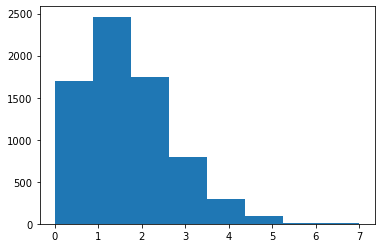

In [40]:
x = Poisson.dist(mu=means.European_Score)
samples = x.random(size=len(plotData.European_Score))
plt.hist(samples, bins=len(set(samples)));

Poisson Distribution histogram for Non European Country Goal Score table

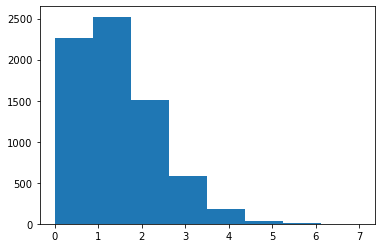

In [41]:
x = Poisson.dist(mu=means.NonEuropean_Score)
samples = x.random(size=len(plotData.NonEuropean_Score))
plt.hist(samples, bins=len(set(samples)));

Skellam has three variables **mu1 and mu2** i.e. λ1 and λ2 whose value is equal to **European_Score and NonEuropean_Score means** and **x**

Then plot the skellam pmf and frozen pmf

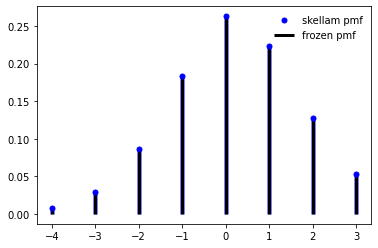

In [42]:
fig, ax = plt.subplots(1, 1)

mu1, mu2 = means[0], means[1]

x = np.arange(skellam.ppf(0.01, mu1, mu2), skellam.ppf(0.99, mu1, mu2))

ax.plot(x, skellam.pmf(x, mu1, mu2), 'bo', ms=5, label='skellam pmf')

ax.vlines(x, 0, skellam.pmf(x, mu1, mu2), colors='b', lw=5, alpha=0.5)

rv = skellam(mu1, mu2)

ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=3, label='frozen pmf')

ax.legend(loc='best', frameon=False)

plt.show() 

# The Method Of Moments (MOM) 

For ***discrete random variables***, the Poisson distribution models **unbounded counts**:

$$X = \{0,1,2,3,\ldots \}$$

$$Y = \{\ldots,-2,-1,0,1,2,\ldots\}$$

Its **probability *mass* function**: 

$$Pr(X=x) = f(x\;|\; \lambda)$$

$$Pr(X=x)=\frac{e^{-\lambda}\lambda^x}{x!}$$

* $X=\{0,1,2,\ldots\}$
* $\lambda > 0$

One useful property of the Poisson distribution is that its **expectation** (or first moment) as well as its **standard deviation** (or second moment) are equal to its *sole* parameter, i.e.:

$$E(X) = \text{Var}(X) = \lambda$$

Skellam has three variables **mu1 and mu2** i.e. λ1 and λ2 whose value is equal to **European_Score and NonEuropean_Score means** and **x**

(array([0.01097664, 0.        , 0.0247678 , 0.        , 0.079651  ,
        0.        , 0.18603997, 0.        , 0.32986209, 0.        ,
        0.49507458, 0.        , 0.42443006, 0.        , 0.25584014,
        0.        , 0.12609063, 0.        , 0.04784689, 0.01942021]),
 array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
         0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <BarContainer object of 20 artists>)

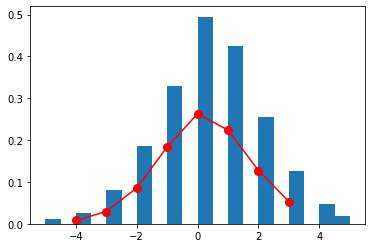

In [43]:
fig, ax = plt.subplots(1, 1)

model = skellam(mu1, mu2)

x = np.arange(skellam.ppf(0.01, mu1, mu2), skellam.ppf(0.99, mu1, mu2))

ax.plot(x, skellam.pmf(x, mu1, mu2), 'bo', ms=8, label='skellam pmf', linestyle='solid', color='red')

ax.hist(plotData.diffScore,density=True, bins=20)

The probability of a draw is simply the sum of the events where the two teams score the same amount of goals.

In [44]:
skellam.pmf(0, mu1, mu2)

0.2629872751227682

# Prediction Model

For prediction I'm using GaussianNB from sklearn

X stores two independent values list **European and Non European Goal Scores**

y is dependent variable of X and store value list **Difference of score** 

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


X = newData.drop(["home_teams", "away_teams", "diffScore"], axis=1)

y = newData["diffScore"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

gnb = GaussianNB()

gnb_fit= gnb.fit(X_train, y_train)

y_pred = gnb_fit.predict(X_test)

percentage = accuracy_score(y_test, y_pred)

print("Model Accuracy is:", percentage * 100, "%")

Model Accuracy is: 65.40084388185655 %
